In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import PercentFormatter

from util import HumorDetectionResults

def plot_results(model, datasets, combine_seeds=False, ax=None, model_info=None):
    ax = ax or plt.gca()
    for dataset in datasets:
        plot_args = {
            "ax": ax, "bins": np.arange(0, 1.05, 0.05), "fill": dataset == "bulwer", "density": False, "histtype": "step"
        }
        # NOTE: removed this because it causes problems with some versions of packages
        # if dataset == "bulwer":
        #     plot_args.update({
        #         "facecolor": model_info[dataset]["color"] + (0.25, ) if model_info else None
        #     })

        results = HumorDetectionResults(dataset, model, combine_seeds=combine_seeds).load()

        label = model_info[dataset]["name"] if model_info else dataset
        color =  model_info[dataset]["color"] if model_info else None

        pd.Series(results).plot.hist(label=label, color=color, weights=np.ones(len(results)) / len(results), **plot_args)

    ax.set_xlabel("Humor Score")
    ax.set_ylabel("Percentage")
    ax.legend()
    ax.set_title(model)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    return ax

## Final Plots

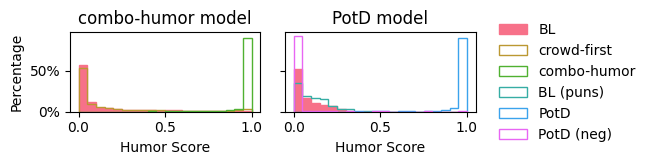

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6.5, 1.75))

palette = sns.husl_palette()

model_info = {
    "bulwer": {"name": "BL", "color": palette[0]},
    "crowd": {"name": "crowd-first", "color": palette[1]},
    "combo-test-pos": {"name": "combo-humor", "color": palette[2]},
    "bulwer-puns": {"name": "BL (puns)", "color": palette[3]},
    "PotD-test-pos": {"name": "PotD", "color": palette[4]},
    "PotD-test-neg": {"name": "PotD (neg)", "color": palette[5]}
}

ax1 = plot_results("humor-detection-comb", ["bulwer", "crowd", "combo-test-pos"], combine_seeds=True, ax=axes.flat[0], model_info=model_info)
ax1.set_title("combo-humor model")
ax2 = plot_results("humor-detection-pun-of-the-day", ["bulwer", "bulwer-puns", "PotD-test-pos", "PotD-test-neg"], combine_seeds=True, ax=axes.flat[1], model_info=model_info)
ax2.set_title("PotD model")

handles = []
labels = []
for ax in axes.flat:
    h, l = ax.get_legend_handles_labels()
    for handle, label in zip(h, l):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

# Make a single legend (outside the subplots)
fig.legend(
    handles, labels,
    loc="center right", ncol=1, frameon=False
)

# Remove the individual legends
for ax in axes.flat:
    ax.legend_.remove()

plt.tight_layout(rect=[0, 0, 0.77, 1])  # leave space for the shared legend

plt.savefig("humor_detection.pdf")